Import knihoven


In [185]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt
import math


Import souboru se jmeny 

In [186]:
#loads coco.names into list classNames 
classesfile='coco.names'
classNames=[]
with open(classesfile,'rt') as f:
    classNames=f.read().rstrip('\n').split('\n')

Model

In [187]:
model = YOLO('yolov8n.pt')#loads the model 

Pokud chci hledat urcity objekt zjisti jeho id

In [188]:
searched_object = 'pottedplant' #name of object I want to find
object_id = classNames.index(searched_object)# gets id of the object I want to find  
print(object_id)

58


nacte a zobrazy zvoleny obrazek

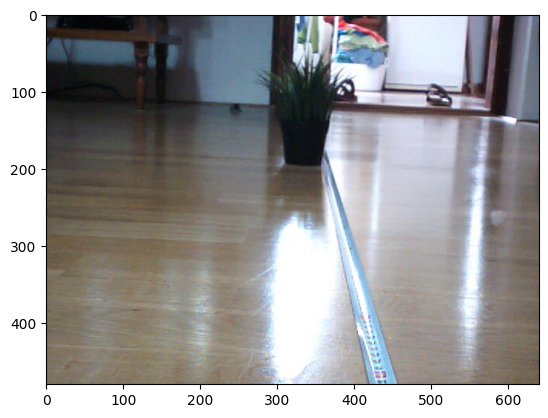

In [189]:
img = cv2.imread('130.jpg')#loads the picture into variable 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#show the picture in rgb because cv2 use BGR color model  

zjisti velikost obrazku 

In [190]:
img_height,img_width,img_channels = img.shape# gets some info 
print('width',img_width,'Px')#width
print('height',img_height,'Px')#height 
print('channels',img_channels)#colour channels 

width 640 Px
height 480 Px
channels 3


pouziti modelu na nalezeni objektu

In [191]:
results = model(img)#applies model on the image 



0: 480x640 1 potted plant, 1 refrigerator, 107.5ms
Speed: 2.1ms preprocess, 107.5ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


vykresleni jednotlivych objektu na obrazek

In [192]:
objects_ids = []#list for ids of found objects 
objects_centers = []#list for objects centers 
objects_heights = []# list for objects height, used for calculating distance of the objects
distances = [] 
for r in results:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])#gets the object id 
            print(classNames[cls])#prints the object class 
            print(cls) #prints the object id 
            #bounding boxes
            x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
            print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px 
            if cls == 58:
                cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),3)#nakresli box okolo detekovane veci 
            #object center 
            center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
            center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
            center = center_x,center_y
            print('center:',center_x,center_y)#vypise udaje 
            if cls == 58:
                cv2.circle(img, (center_x,center_y),10, (255,0,255), thickness=-1)
            #model confidence
            conf = box.conf[0]#jistota modelu 
            conf = float(conf*100)
            rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
            print('confidence:',rounded_conf)
            #box on bounding box s nazvem claasy a confidence modelu
            if cls == 58:
                cvzone.putTextRect(img, f'{classNames[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
            objects_ids.append(cls)#zapisovani hodnot do listu
            objects_centers.append(center)#zapisovani hodnot do listu
            objects_heights.append(y2)
            distance = img_height-y1-y2
            print(distance)
            distances.append(distance)
cv2.line(img,(int(img_width/2),0),(int(img_width/2),img_height),(255,0,0),thickness=2 )#vykresli na video primku stredem videa

pottedplant
58
X= 270 Y= 0 W= 402 H= 197
center: 336 98
confidence: 61
283
refrigerator
72
X= 355 Y= 120 W= 639 H= 478
center: 497 299
confidence: 43
-118


array([[[ 33,  37,  38],
        [ 33,  37,  38],
        [ 36,  38,  38],
        ...,
        [128, 112,  99],
        [122, 109,  95],
        [118, 105,  91]],

       [[ 37,  39,  40],
        [ 37,  39,  40],
        [ 37,  39,  39],
        ...,
        [128, 112,  99],
        [122, 109,  95],
        [118, 105,  91]],

       [[ 40,  40,  40],
        [ 40,  40,  40],
        [ 40,  40,  40],
        ...,
        [128, 112,  99],
        [125, 109,  96],
        [121, 105,  92]],

       ...,

       [[ 92, 112, 123],
        [ 90, 113, 121],
        [ 91, 113, 124],
        ...,
        [ 80,  97, 116],
        [ 79,  96, 117],
        [ 78,  95, 116]],

       [[ 91, 114, 122],
        [ 91, 115, 121],
        [ 92, 115, 123],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 114],
        [ 75,  91, 114]],

       [[ 91, 115, 121],
        [ 92, 116, 122],
        [ 91, 117, 123],
        ...,
        [ 75,  92, 111],
        [ 73,  89, 112],
        [ 72,  88, 111]]

vypise id nalezenych objektu 

In [193]:
print(objects_ids)
print(objects_centers)
print(objects_heights)

[58, 72]
[(336, 98), (497, 299)]
[197, 478]


hledani urciteho objektu

In [194]:
a = objects_ids.index(58)#in list object_ids search for specific number and returns index of the number
print(a)#prints the index 
x,y=objects_centers[a]#in list finds values for given index
print(x,y)#prints the values 
center_line = int(img_width/2)# x coordinates of image center
object_deviation = center_line-x # deviation of object from center of the screen 
print('deviation = ',object_deviation) 
h = objects_heights[a] # for given index finds object height 
print(h)
#measuring distances 
d=distances[a] # for given index finds distance of the object in px 
cv2.line(img,(0,(img_height-d)),(img_width,(img_height-d)),(0,255,0),thickness=2) #draws a line where is the object 
print(d) # prints object distance in px
#calculator from px to cm 
#if distance in px is larger than 240 px use this equation
if d>240:
    distance_cm = 0.001894930772332081 * (d- 62.49315340028377 )**2+ 41.845975945942605
#if distance in px is smaller than 240 px use this equation
if d<240:
    distance_cm = np.exp( 3.486047002894599 )*np.exp(0.0045*d)
print('distance:',distance_cm,'cm')# prints the value in cm
#angle calculating 
angle = math.atan(object_deviation/d)
print(np.rad2deg(angle),'°')
#way lenght 
w = distance_cm/(math.cos(abs(angle)))
print('distance to target:',w,'cm')





0
336 98
deviation =  -16
197
283
distance: 133.98370537837536 cm
-3.2358925085412387 °
distance to target: 134.19767023575818 cm


ukaze obrazek

tensor([[2.7026e+02, 8.6972e-01, 4.0234e+02, 1.9749e+02, 6.1519e-01, 5.8000e+01],
        [3.5512e+02, 1.2043e+02, 6.3995e+02, 4.7898e+02, 4.3980e-01, 7.2000e+01]])


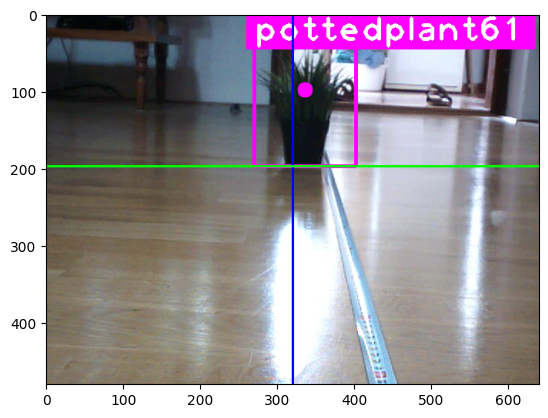

In [195]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))# konvertuje bgr to rgb
print(boxes.data)
